In [1]:
# import useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
df_train=pd.read_csv('house_train.csv')
df_test=pd.read_csv('house_test.csv')
pd.set_option('Display.max_columns',None)
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1          TA       

In [7]:
print(df_train.shape)
print(df_test.shape)

(1168, 81)
(292, 80)


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [9]:
df_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1168.000000  1168.000000    954.00000    1168.000000  1168.000000   
mean    724.136130    56.767979     70.98847   10484.749144     6.104452   
std     416.159877    41.940650     24.82875    8957.442311     1.390153   
min       1.000000    20.000000     21.00000    1300.000000     1.000000   
25%     360.500000    20.000000     60.00000    7621.500000     5.000000   
50%     714.500000    50.000000     70.00000    9522.500000     6.000000   
75%    1079.500000    70.000000     80.00000   11515.500000     7.000000   
max    1460.000000   190.000000    313.00000  164660.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1168.000000  1168.000000   1168.000000  1161.000000  1168.000000   
mean      5.595890  1970.930651   1984.758562   102.310078   444.726027   
std       1.124343    30.145255     20.785185   182.595606   462.664785   
min       1.000000  1875.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1966.000000     0.000000     0.000000   
50%       5.000000  1972.000000   1993.000000     0.000000   385.500000   
75%       6.000000  2000.000000   2004.000000   160.000000   714.500000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean     46.647260   569.721747  1061.095034  1169.860445   348.826199   
std     163.520016   449.375525   442.272249   391.161983   439.696370   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   216.000000   799.000000   892.000000     0.000000   
50%       0.000000   474.000000  1005.500000  1096.500000     0.000000   
75%       0.000000   816.000000  1291.500000  1392.000000   729.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1168.000000  1168.000000   1168.000000   1168.000000  1168.000000   
mean       6.380137  1525.066781      0.425514      0.055651     1.562500   
std       50.892844   528.042957      0.521615      0.236699     0.551882   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1143.250000      0.000000      0.000000     1.000000   
50%        0.000000  1468.500000      0.000000      0.000000     2.000000   
75%        0.000000  1795.000000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1168.000000   1168.000000   1168.000000   1168.000000  1168.000000   
mean      0.388699      2.884418      1.045377      6.542808     0.617295   
std       0.504929      0.817229      0.216292      1.598484     0.650575   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1104.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean   1978.193841     1.776541   476.860445    96.206336    46.559932   
std      24.890704     0.745554   214.466769   126.158988    66.381023   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   338.000000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    24.000000   
75%    2002.000000     2.000000   576.000000   171.000000    70.000000   
max    2

In [11]:
pd.set_option('Display.max_rows', None)

df_train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [12]:
# Here we drop id column because it is not useful for our model
# we also drop MiscFeature column because it contains extra categories of home and have almost 96% null values.
df_train.drop("Id",axis=1,inplace=True)
df_train.drop("MiscFeature",axis=1,inplace=True)

df_test.drop("Id",axis=1,inplace=True)
df_test.drop("MiscFeature",axis=1,inplace=True)

In [13]:
# instead of drop null values which will result in data loss, we will fill null values according to provided data description.

df_train["LotFrontage"].fillna(0,inplace=True)
df_train["MasVnrArea"].fillna(0,inplace=True)

df_train["MasVnrType"].fillna("None",inplace=True)

#NA in Alley column means No Alley, so we will replace NA by it.
df_train["Alley"].fillna("No Alley",inplace=True)

#NA in BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2 column means No basement, so we will replace NA by it.
df_train["BsmtQual"].fillna("No basement",inplace=True)
df_train["BsmtCond"].fillna("No basement",inplace=True)
df_train["BsmtExposure"].fillna("No basement",inplace=True)
df_train["BsmtFinType1"].fillna("No basement",inplace=True)
df_train["BsmtFinType2"].fillna("No basement",inplace=True)

#NA in Fence column means No Fence, so we will replace NA by it.
df_train["FireplaceQu"].fillna("No Fireplace",inplace=True)

#NA in GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond columns mean No Garage, so we will replace NA by it.
df_train["GarageType"].fillna("No Garage",inplace=True)
df_train["GarageFinish"].fillna("No Garage",inplace=True)
df_train["GarageQual"].fillna("No Garage",inplace=True)
df_train["GarageCond"].fillna("No Garage",inplace=True)
df_train['GarageYrBlt'].fillna("No Garage",inplace=True)

#NA in PoolQC column means No Pool, so we will replace NA by it.
df_train["PoolQC"].fillna("No Pool",inplace=True)

#NA in Fence column means No Fence, so we will replace NA by it.
df_train["Fence"].fillna("No Fence",inplace=True)

In [14]:
# fill null values for test data
df_test["LotFrontage"].fillna(0,inplace=True)
df_test["MasVnrArea"].fillna(0,inplace=True)

df_test["MasVnrType"].fillna("None",inplace=True)

#NA in Alley column means No Alley, so we will replace NA by it.
df_test["Alley"].fillna("No Alley",inplace=True)

#NA in BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2 column means No basement, so we will replace NA by it.
df_test["BsmtQual"].fillna("No basement",inplace=True)
df_test["BsmtCond"].fillna("No basement",inplace=True)
df_test["BsmtExposure"].fillna("No basement",inplace=True)
df_test["BsmtFinType1"].fillna("No basement",inplace=True)
df_test["BsmtFinType2"].fillna("No basement",inplace=True)

#NA in Fence column means No Fence, so we will replace NA by it.
df_test["FireplaceQu"].fillna("No Fireplace",inplace=True)

#NA in GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond columns mean No Garage, so we will replace NA by it.
df_test["GarageType"].fillna("No Garage",inplace=True)
df_test["GarageFinish"].fillna("No Garage",inplace=True)
df_test["GarageQual"].fillna("No Garage",inplace=True)
df_test["GarageCond"].fillna("No Garage",inplace=True)
df_test['GarageYrBlt'].fillna("No Garage",inplace=True)

#NA in PoolQC column means No Pool, so we will replace NA by it.
df_test["PoolQC"].fillna("No Pool",inplace=True)

#NA in Fence column means No Fence, so we will replace NA by it.
df_test["Fence"].fillna("No Fence",inplace=True)

In [15]:
# converting datatype of some variables into object to treat them as a categorical variables.
df_train["MSSubClass"] = df_train["MSSubClass"].astype('object')
df_train['OverallQual'] = df_train['OverallQual'].astype('object')
df_train['OverallCond'] = df_train['OverallCond'].astype('object')
df_train['BsmtFullBath'] = df_train['BsmtFullBath'].astype('object')
df_train['BsmtHalfBath'] = df_train['BsmtHalfBath'].astype('object')
df_train['FullBath'] = df_train['FullBath'].astype('object')
df_train['HalfBath'] = df_train['HalfBath'].astype('object')
df_train['Fireplaces'] = df_train['Fireplaces'].astype('object')
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].astype('object')

In [16]:
# converting datatypes for test data
df_test["MSSubClass"] = df_test["MSSubClass"].astype('object')
df_test['OverallQual'] = df_test['OverallQual'].astype('object')
df_test['OverallCond'] = df_test['OverallCond'].astype('object')
df_test['BsmtFullBath'] = df_test['BsmtFullBath'].astype('object')
df_test['BsmtHalfBath'] = df_test['BsmtHalfBath'].astype('object')
df_test['FullBath'] = df_test['FullBath'].astype('object')
df_test['HalfBath'] = df_test['HalfBath'].astype('object')
df_test['Fireplaces'] = df_test['Fireplaces'].astype('object')
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].astype('object')

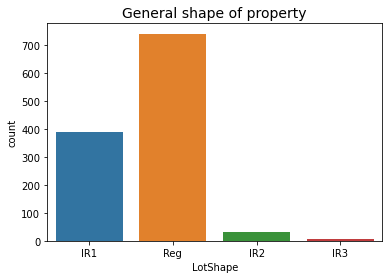

In [17]:
sns.countplot("LotShape", data=df_train)
plt.title("General shape of property", fontsize=14)
plt.show()

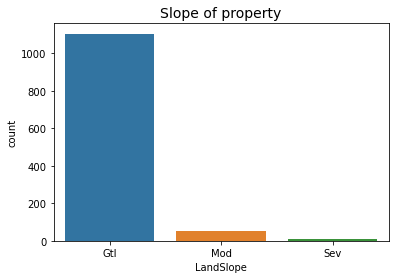

In [18]:
sns.countplot("LandSlope", data=df_train)
plt.title("Slope of property", fontsize=14)
plt.show()

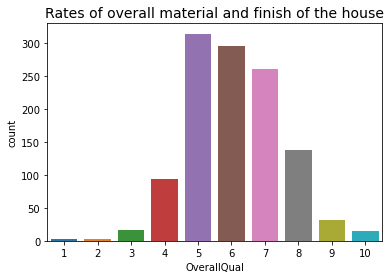

5     314
6     295
7     260
8     138
4      93
9      32
3      16
10     15
2       3
1       2
Name: OverallQual, dtype: int64

In [19]:
sns.countplot("OverallQual", data=df_train)
plt.title("Rates of overall material and finish of the house", fontsize=14)
plt.show()

df_train["OverallQual"].value_counts()

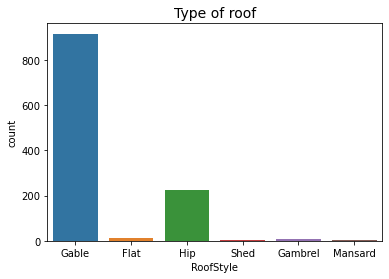

Gable      915
Hip        225
Flat        12
Gambrel      9
Mansard      5
Shed         2
Name: RoofStyle, dtype: int64

In [20]:
sns.countplot("RoofStyle", data=df_train)
plt.title("Type of roof", fontsize=14)
plt.show()

df_train["RoofStyle"].value_counts()

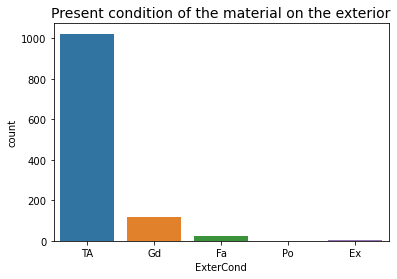

In [21]:
sns.countplot("ExterCond", data=df_train)
plt.title("Present condition of the material on the exterior", fontsize=14)
plt.show()

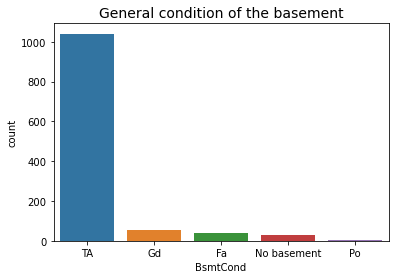

TA             1041
Gd               56
Fa               39
No basement      30
Po                2
Name: BsmtCond, dtype: int64

In [22]:
sns.countplot("BsmtCond", data=df_train)
plt.title("General condition of the basement", fontsize=14)
plt.show()

df_train["BsmtCond"].value_counts()

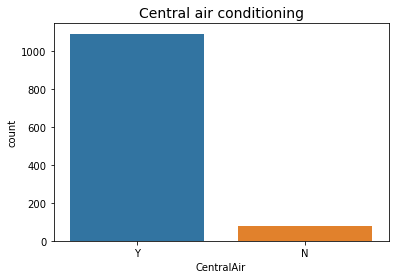

In [23]:
sns.countplot("CentralAir", data=df_train)
plt.title("Central air conditioning", fontsize=14)
plt.show()

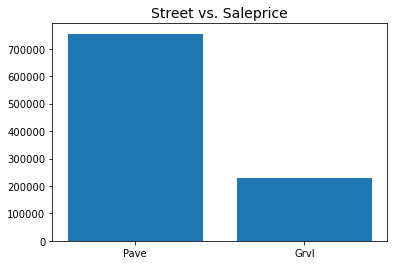

In [24]:
plt.bar(df_train["Street"],df_train["SalePrice"])
plt.title("Street vs. Saleprice", fontsize=14)
plt.show()

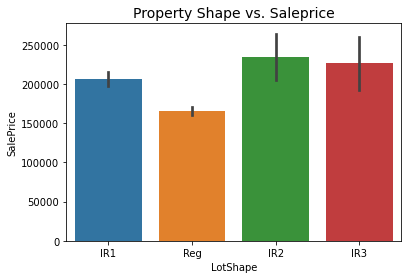

In [25]:
sns.barplot(x="LotShape",y="SalePrice",data=df_train)
plt.title("Property Shape vs. Saleprice", fontsize=14)
plt.show()

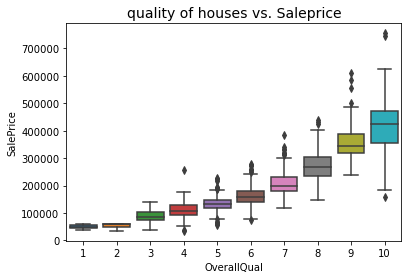

In [26]:
sns.boxplot(x="OverallQual",y="SalePrice",data=df_train)
plt.title("quality of houses vs. Saleprice", fontsize=14)
plt.show()

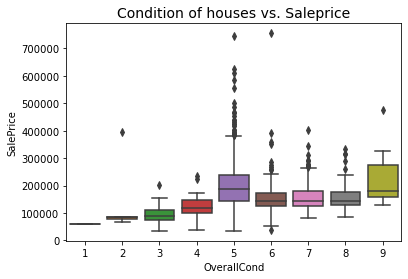

In [27]:
sns.boxplot(x="OverallCond",y="SalePrice",data=df_train)
plt.title("Condition of houses vs. Saleprice", fontsize=14)
plt.show()

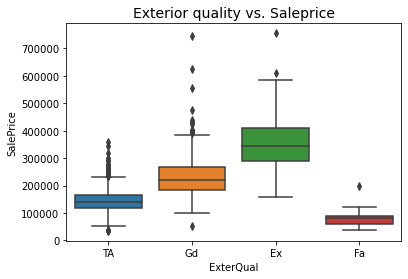

In [28]:
sns.boxplot(x="ExterQual",y="SalePrice",data=df_train)
plt.title("Exterior quality vs. Saleprice", fontsize=14)
plt.show()

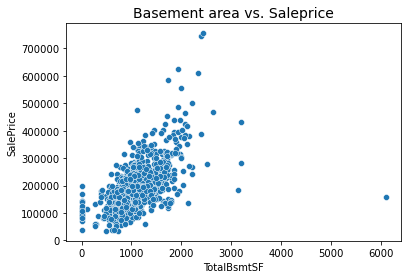

In [29]:
sns.scatterplot(x="TotalBsmtSF",y="SalePrice",data=df_train)
plt.title("Basement area vs. Saleprice", fontsize=14)
plt.show()

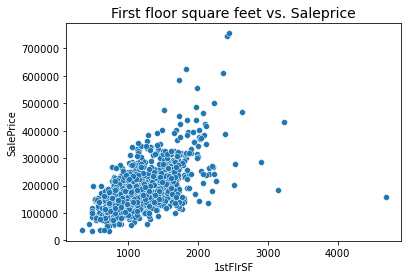

In [30]:
sns.scatterplot(x="1stFlrSF",y="SalePrice",data=df_train)
plt.title("First floor square feet vs. Saleprice", fontsize=14)
plt.show()

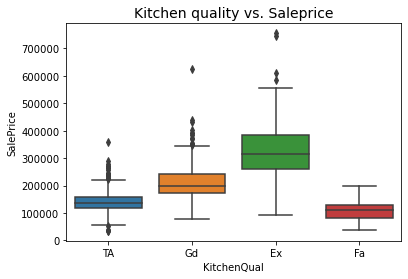

In [31]:
sns.boxplot(x="KitchenQual",y="SalePrice",data=df_train)
plt.title("Kitchen quality vs. Saleprice", fontsize=14)
plt.show()

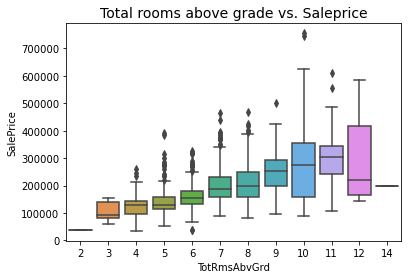

In [32]:
sns.boxplot(x="TotRmsAbvGrd",y="SalePrice",data=df_train)
plt.title("Total rooms above grade vs. Saleprice", fontsize=14)
plt.show()

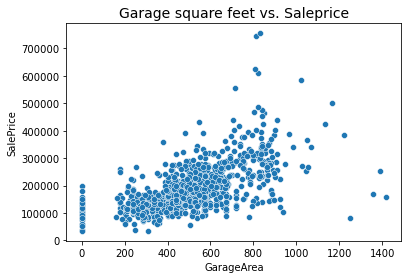

In [33]:
sns.scatterplot(x="GarageArea",y="SalePrice",data=df_train)
plt.title("Garage square feet vs. Saleprice", fontsize=14)
plt.show()

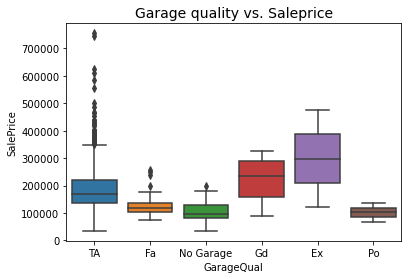

In [34]:
sns.boxplot(x="GarageQual",y="SalePrice",data=df_train)
plt.title("Garage quality vs. Saleprice", fontsize=14)
plt.show()

In [35]:
#split numerical and categorical columns of train dataset
numerical_col = df_train.select_dtypes(include=['float64','int64'])
cat_col = df_train.select_dtypes(include=['object'])

In [36]:
#split numerical and categorical columns of test dataset
numerical_col_test = df_test.select_dtypes(include=['float64','int64'])
cat_col_test = df_test.select_dtypes(include=['object'])

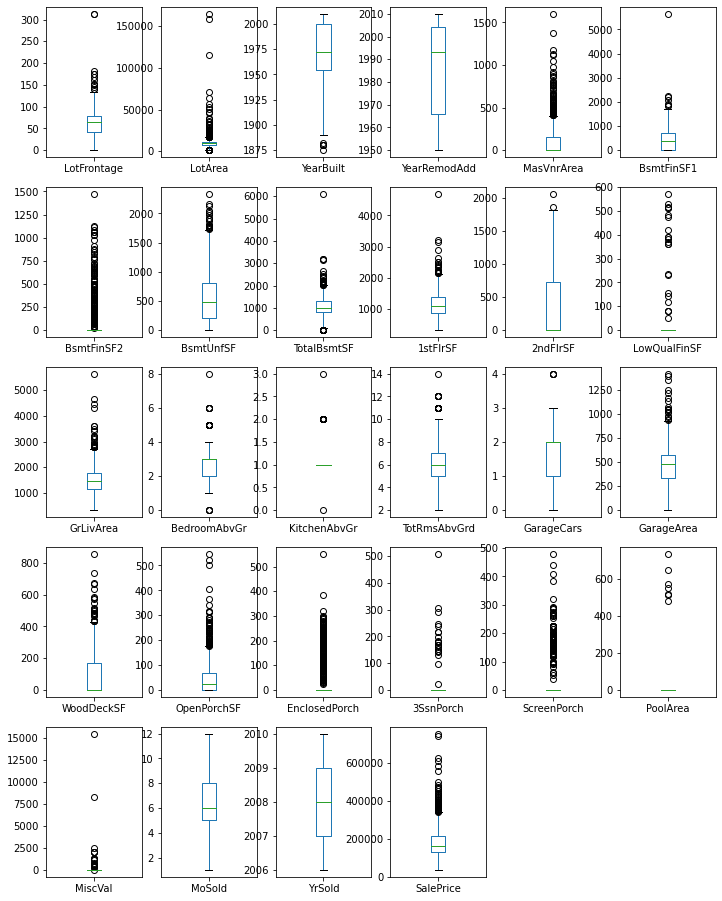

In [37]:
# check outliers through plotting boxplot.
numerical_col.plot.box(subplots=True,figsize=(12,16),layout=(5,6))
plt.show()

In [38]:
# Check outliers using zscore
from scipy.stats import zscore
z = np.abs(zscore(numerical_col))
threshold=3
print(np.where(z>3))

(array([   1,    1,    7,   14,   20,   22,   23,   25,   32,   32,   32,
         33,   38,   47,   51,   51,   63,   66,   66,   68,   68,   72,
         73,   74,   76,   77,   78,   91,   93,   93,   95,   96,   97,
         98,  103,  103,  103,  103,  103,  103,  106,  107,  112,  113,
        115,  119,  119,  119,  127,  133,  138,  138,  140,  141,  141,
        141,  141,  141,  141,  141,  142,  142,  143,  150,  151,  152,
        156,  157,  166,  170,  178,  178,  191,  192,  192,  192,  196,
        206,  210,  211,  212,  214,  216,  226,  228,  232,  232,  232,
        232,  237,  241,  241,  241,  241,  243,  245,  245,  253,  254,
        255,  269,  272,  273,  284,  284,  289,  299,  299,  300,  304,
        305,  305,  305,  305,  305,  305,  308,  309,  310,  310,  312,
        319,  320,  325,  333,  335,  338,  338,  352,  352,  355,  356,
        357,  361,  361,  361,  361,  361,  361,  361,  362,  363,  369,
        372,  378,  379,  380,  381,  387,  389,  

In [39]:
df_train1 = numerical_col[(z<3).all(axis=1)]
df_train1.head()

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0          0.0     4928       1976          1976         0.0         120   
2         92.0     9920       1996          1997         0.0         862   
3        105.0    11751       1977          1977       480.0         705   
4          0.0    16635       1977          2000       126.0        1246   
5         58.0    14054       2006          2006         0.0           0   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0           0        958         1078       958         0             0   
2           0        255         1117      1127       886             0   
3           0       1139         1844      1844         0             0   
4           0        356         1602      1602         0             0   
5           0        879          879       879       984             0   

   GrLivArea  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  GarageCars  \
0        958             2             1             5           2   
2       2013             3             1             8           2   
3       1844             3             1             7           2   
4       1602             3             1             8           2   
5       1863             4             1             9           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         440           0          205              0          0            0   
2         455         180          130              0          0            0   
3         546           0          122              0          0            0   
4         529         240            0              0          0            0   
5         660         100           17              0          0            0   

   PoolArea  MiscVal  MoSold  YrSold  SalePrice  
0         0        0       2    2007     128000  
2         0        0       6    2007     269790  
3         0        0       1    2010     190000  
4         0        0       6    2009     215000  
5         0        0      11    2006     219210

In [40]:
print(df_train.shape)
print(df_train1.shape)

(1168, 79)
(878, 28)


In [41]:
percentage_loss = ((1168-878)/1168)*100
percentage_loss

24.82876712328767

In [42]:
# check outliers using inter quartile range.
Q1=numerical_col.quantile(0.25)
Q3=numerical_col.quantile(0.75)
IQR=Q3-Q1
print(IQR)

LotFrontage         37.50
LotArea           3894.00
YearBuilt           46.00
YearRemodAdd        38.00
MasVnrArea         160.00
BsmtFinSF1         714.50
BsmtFinSF2           0.00
BsmtUnfSF          600.00
TotalBsmtSF        492.50
1stFlrSF           500.00
2ndFlrSF           729.00
LowQualFinSF         0.00
GrLivArea          651.75
BedroomAbvGr         1.00
KitchenAbvGr         0.00
TotRmsAbvGrd         2.00
GarageCars           1.00
GarageArea         238.00
WoodDeckSF         171.00
OpenPorchSF         70.00
EnclosedPorch        0.00
3SsnPorch            0.00
ScreenPorch          0.00
PoolArea             0.00
MiscVal              0.00
MoSold               3.00
YrSold               2.00
SalePrice        84625.00
dtype: float64


In [43]:
df_new1=numerical_col[~((numerical_col < (Q1 - 1.5 * IQR)) | (numerical_col > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_new1.shape)

(548, 28)


In [44]:
# here, our target variable is saleprice, so we take it as a y variable. It is a regression type problem. 
x = df_train.drop(["SalePrice"],axis=1)
y = df_train["SalePrice"]

In [45]:
x.skew()

MSSubClass        1.422019
LotFrontage       0.364916
LotArea          10.659285
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
MasVnrArea        2.835718
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
LowQualFinSF      8.666142
GrLivArea         1.449952
BsmtFullBath      0.627106
BsmtHalfBath      4.264403
FullBath          0.057809
HalfBath          0.656492
BedroomAbvGr      0.243855
KitchenAbvGr      4.365259
TotRmsAbvGrd      0.644657
Fireplaces        0.671966
GarageCars       -0.358556
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
3SsnPorch         9.770611
ScreenPorch       4.105741
PoolArea         13.243711
MiscVal          23.065943
MoSold            0.220979
YrSold            0.115765
dtype: float64

<AxesSubplot:xlabel='LowQualFinSF', ylabel='Density'>

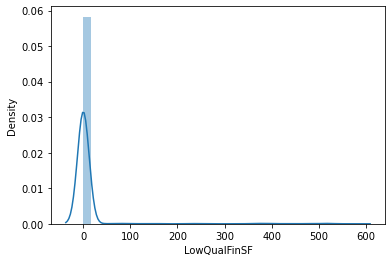

In [46]:
sns.distplot(df_train["LowQualFinSF"])

<AxesSubplot:xlabel='PoolArea', ylabel='Density'>

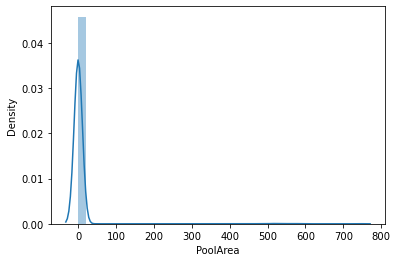

In [47]:
sns.distplot(df_train["PoolArea"])

<AxesSubplot:xlabel='MiscVal', ylabel='Density'>

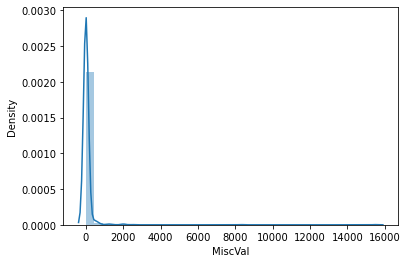

In [48]:
sns.distplot(df_train["MiscVal"])

In [49]:
# here, we remove skewness of numerical data using log method.
x = x.select_dtypes(include=['float64','int64'])
x = np.log1p(x)

# remove skewness for test dataset
z = df_test.select_dtypes(include=['float64','int64'])
z = np.log1p(z)

In [50]:
# merge numerical and categorical variables for train dataset
x_new = pd.concat([x,cat_col],axis=1)

# merge numerical and categorical variables data for test dataset.
df_test = pd.concat([z,cat_col_test],axis=1)

In [51]:
# merge train and test dataset for encoding.
df = pd.concat((x_new,df_test))

In [52]:
# Here, we convert categorical data into numerical data for model building and we use one hot encoding method.
x_encode = pd.get_dummies(df, drop_first=True)
x_encode.shape

(1460, 387)

In [53]:
#scaling data with mean=0 and unit variance using standard scaler mothod
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_s = sc.fit_transform(x_encode)

In [54]:
# here, we split train dataset and test dataset for further process.
x = x_encode.head(1168) # we already split our target variable in above process as y 

df_test = x_encode.tail(292)

In [55]:
# split train and test data from training dataset.
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [56]:
# our target variable is saleprice so it's a regression type problem.
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

model = [LinearRegression(),SVR(),KNeighborsRegressor(),DecisionTreeRegressor(),ExtraTreeRegressor()]

for i in model:
    i.fit(x_train,y_train)
    train=i.score(x_train,y_train)
    predi=i.predict(x_test)
    print("Accuracy of",i,"is:")
    print("Model training accuracy:",train)
    print("r2 score:",r2_score(y_test,predi))
    print("mean absolute error:",mean_absolute_error(y_test,predi))
    print("root mean squared error:",np.sqrt(mean_squared_error(y_test,predi)))
    print("******************************************************************")
    print("\n")

Accuracy of LinearRegression() is:
Model training accuracy: 0.9559585859368886
r2 score: 0.05932849102639992
mean absolute error: 33051.430909699644
root mean squared error: 80929.32412722446
******************************************************************


Accuracy of SVR() is:
Model training accuracy: -0.047471026228074864
r2 score: -0.05218153332448927
mean absolute error: 58389.214981863326
root mean squared error: 85591.81896267603
******************************************************************


Accuracy of KNeighborsRegressor() is:
Model training accuracy: 0.7126954239916767
r2 score: 0.460023514309703
mean absolute error: 36024.52260273972
root mean squared error: 61316.07437046825
******************************************************************


Accuracy of DecisionTreeRegressor() is:
Model training accuracy: 1.0
r2 score: 0.7072882328958486
mean absolute error: 27199.89383561644
root mean squared error: 45144.724709379014
*********************************************

In [58]:
!pip install catboost

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

model = [RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),ExtraTreesRegressor(),XGBRegressor(),CatBoostRegressor()]

for m in model:
    m.fit(x_train,y_train)
    train = m.score(x_train,y_train)
    predm = m.predict(x_test)
    print("Accuracy of",m,"is:")
    print("Model training accuracy:",train)
    print("r2 score:",r2_score(y_test,predm))
    print("mean absolute error:",mean_absolute_error(y_test,predm))
    print("root mean squared error:",np.sqrt(mean_squared_error(y_test,predm)))
    print("******************************************************************")
    print("\n")

Accuracy of RandomForestRegressor() is:
Model training accuracy: 0.9798193463804691
r2 score: 0.7879764429336085
mean absolute error: 20723.733664383562
root mean squared error: 38421.91230471991
******************************************************************


Accuracy of AdaBoostRegressor() is:
Model training accuracy: 0.8801885263436539
r2 score: 0.7556008965435
mean absolute error: 25259.85552297486
root mean squared error: 41251.21289587004
******************************************************************


Accuracy of GradientBoostingRegressor() is:
Model training accuracy: 0.9712399474669892
r2 score: 0.8236732813757128
mean absolute error: 19316.937988453126
root mean squared error: 35038.53834820526
******************************************************************


Accuracy of ExtraTreesRegressor() is:
Model training accuracy: 1.0
r2 score: 0.8070975594294341
mean absolute error: 20361.202945205478
root mean squared error: 36648.46417707223
******************************

In [61]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor()
parameters={'n_estimators':[25,50,100,120,150,200,250],'ccp_alpha':[0.0001,0.001,0.01,0.1,0.2,0.3]}
reg = GridSearchCV(rf,parameters)
reg.fit(x_train,y_train)

print(reg.best_params_)

{'ccp_alpha': 0.001, 'n_estimators': 100}


In [62]:
rf = RandomForestRegressor(ccp_alpha=0.001,n_estimators=100)
rf.fit(x_train,y_train)
train = rf.score(x_train,y_train)
pred_rf=rf.predict(x_test)
print("Model training accuracy:",train)
print("r2_score:",r2_score(y_test,pred_rf))
print("mean absolute error:",mean_absolute_error(y_test,pred_rf))
print("root mean squared error", np.sqrt(mean_squared_error(y_test,pred_rf)))

Model training accuracy: 0.9790215185373021
r2_score: 0.7772841721162393
mean absolute error: 21035.589657534245
root mean squared error 39378.7983535835


In [63]:
gb = GradientBoostingRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,0.2],'n_estimators':[25,50,100,120],'max_depth':[3,4,5],'ccp_alpha':[0.0,0.001,0.01,0.1,0.2]}
reg = GridSearchCV(gb,parameters)
reg.fit(x_train,y_train)

print(reg.best_params_)

{'ccp_alpha': 0.01, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 120}


In [64]:
gb = GradientBoostingRegressor(ccp_alpha=0.01,learning_rate=0.2,max_depth=3,n_estimators=120)
gb.fit(x_train,y_train)
train=gb.score(x_train,y_train)
pred_gb=gb.predict(x_test)
print("Model training accuracy:",train)
print("r2_score:",r2_score(y_test,pred_gb))
print("mean absolute error:",mean_absolute_error(y_test,pred_gb))
print("root mean squared error", np.sqrt(mean_squared_error(y_test,pred_gb)))

Model training accuracy: 0.9874492181744864
r2_score: 0.8338902753575492
mean absolute error: 18721.194128907868
root mean squared error 34008.26275583877


In [65]:
xg = XGBRegressor()
parameters={'n_estimators':[80,100,200,300],'max_depth':[3,4,5,6],'learning_rate':[0.001,0.1,0.2,0.3,0.4]}
reg = GridSearchCV(xg,parameters)
reg.fit(x_train,y_train)

print(reg.best_params_)

{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 200}


In [66]:
xg = XGBRegressor(learning_rate=0.3,max_depth=5,n_estimators=200)
xg.fit(x_train,y_train)
train=xg.score(x_train,y_train)
pred_xg=xg.predict(x_test)
print("Model training accuracy:",train)
print("r2_score:",r2_score(y_test,pred_xg))
print("mean absolute error:",mean_absolute_error(y_test,pred_xg))
print("root mean squared error", np.sqrt(mean_squared_error(y_test,pred_xg)))

Model training accuracy: 0.9999064957301497
r2_score: 0.8066356552329178
mean absolute error: 20111.17998180651
root mean squared error 36692.31524994422


In [67]:
cat = CatBoostRegressor()
parameters={'iterations':[500,700,1000],'learning_rate':[0.001,0.01,0.02,0.1,0.2],'depth':[4,5]}
reg = GridSearchCV(cat,parameters)
reg.fit(x_train,y_train)

print(reg.best_params_)

0:	learn: 79531.8967341	total: 2.02ms	remaining: 1.01s
1:	learn: 79483.4295320	total: 4.1ms	remaining: 1.02s
2:	learn: 79431.7292470	total: 6.09ms	remaining: 1.01s
3:	learn: 79386.7566197	total: 8.09ms	remaining: 1s
4:	learn: 79338.4939366	total: 10.2ms	remaining: 1.01s
5:	learn: 79290.6360759	total: 12.5ms	remaining: 1.03s
6:	learn: 79243.9307805	total: 14.6ms	remaining: 1.03s
7:	learn: 79202.7969867	total: 16.5ms	remaining: 1.01s
8:	learn: 79158.2196220	total: 18.4ms	remaining: 1s
9:	learn: 79113.7294723	total: 20.3ms	remaining: 995ms
10:	learn: 79071.3302457	total: 22.3ms	remaining: 993ms
11:	learn: 79033.5313227	total: 24.3ms	remaining: 987ms
12:	learn: 78984.3527405	total: 26.1ms	remaining: 978ms
13:	learn: 78938.6471872	total: 28.2ms	remaining: 979ms
14:	learn: 78888.9081529	total: 30.2ms	remaining: 976ms
15:	learn: 78840.0255358	total: 32.1ms	remaining: 971ms
16:	learn: 78799.3845396	total: 34.1ms	remaining: 968ms
17:	learn: 78752.4621304	total: 36ms	remaining: 965ms
18:	learn: 

In [68]:
cat = CatBoostRegressor(depth=4,iterations=500,learning_rate=0.1)
cat.fit(x_train,y_train)
train=cat.score(x_train,y_train)
pred_cat=cat.predict(x_test)
print("Model training accuracy:",train)
print("r2_score:",r2_score(y_test,pred_cat))
print("mean absolute error:",mean_absolute_error(y_test,pred_cat))
print("root mean squared error", np.sqrt(mean_squared_error(y_test,pred_cat)))

0:	learn: 72845.8125443	total: 5.24ms	remaining: 2.61s
1:	learn: 68632.0608555	total: 7.84ms	remaining: 1.95s
2:	learn: 65076.8114019	total: 10.3ms	remaining: 1.71s
3:	learn: 61645.1556349	total: 12.9ms	remaining: 1.6s
4:	learn: 58870.7864521	total: 15.7ms	remaining: 1.55s
5:	learn: 55878.1682772	total: 19.5ms	remaining: 1.6s
6:	learn: 53502.6265878	total: 23.7ms	remaining: 1.67s
7:	learn: 51227.3578949	total: 49.7ms	remaining: 3.06s
8:	learn: 49030.3626367	total: 52.2ms	remaining: 2.85s
9:	learn: 47355.3749149	total: 54.5ms	remaining: 2.67s
10:	learn: 45661.6686518	total: 56.9ms	remaining: 2.53s
11:	learn: 44287.7871268	total: 59.3ms	remaining: 2.41s
12:	learn: 42754.4137620	total: 61.4ms	remaining: 2.3s
13:	learn: 41271.5009904	total: 63.4ms	remaining: 2.2s
14:	learn: 40021.3591373	total: 65.5ms	remaining: 2.12s
15:	learn: 38948.3373700	total: 67.4ms	remaining: 2.04s
16:	learn: 37812.7235952	total: 69.6ms	remaining: 1.98s
17:	learn: 36892.8323604	total: 71.5ms	remaining: 1.91s
18:	le

In [69]:
# agian we run our best model for saving purpose
cat_ = CatBoostRegressor()
cat_.fit(x_train,y_train)
train=cat_.score(x_train,y_train)
pred_cat_=cat_.predict(x_test)
print("Model training accuracy:",train)
print("r2_score:",r2_score(y_test,pred_cat_))
print("mean absolute error:",mean_absolute_error(y_test,pred_cat_))
print("root mean squared error", np.sqrt(mean_squared_error(y_test,pred_cat_)))

Learning rate set to 0.040095
0:	learn: 75651.2900636	total: 5.92ms	remaining: 5.91s
1:	learn: 73971.6871256	total: 16.3ms	remaining: 8.15s
2:	learn: 72346.9117348	total: 22.3ms	remaining: 7.41s
3:	learn: 70734.8018620	total: 26.8ms	remaining: 6.68s
4:	learn: 69157.3638268	total: 34ms	remaining: 6.76s
5:	learn: 67559.1695051	total: 38.5ms	remaining: 6.38s
6:	learn: 66120.5666459	total: 43.3ms	remaining: 6.15s
7:	learn: 64731.7249030	total: 48.6ms	remaining: 6.02s
8:	learn: 63390.7003676	total: 53.5ms	remaining: 5.89s
9:	learn: 61985.1459746	total: 57.9ms	remaining: 5.74s
10:	learn: 60777.4298713	total: 62.8ms	remaining: 5.64s
11:	learn: 59419.2842484	total: 67.3ms	remaining: 5.54s
12:	learn: 58146.1168246	total: 72.1ms	remaining: 5.47s
13:	learn: 57102.7744882	total: 76.5ms	remaining: 5.38s
14:	learn: 55888.3650381	total: 81.3ms	remaining: 5.34s
15:	learn: 54755.7154803	total: 85.8ms	remaining: 5.28s
16:	learn: 53647.3935911	total: 90.6ms	remaining: 5.24s
17:	learn: 52700.7697043	total

In [70]:
# we got good accuracy using catboost and check accuracy of model with cross-validation
accuracy = cross_val_score(cat,x,y,cv = 10,scoring="r2")
print(accuracy)
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

0:	learn: 75271.4988346	total: 5.56ms	remaining: 2.77s
1:	learn: 70865.3870119	total: 8.12ms	remaining: 2.02s
2:	learn: 66778.7557399	total: 10.5ms	remaining: 1.74s
3:	learn: 63296.0379080	total: 12.6ms	remaining: 1.56s
4:	learn: 60139.3056181	total: 14.8ms	remaining: 1.47s
5:	learn: 57133.6394690	total: 16.9ms	remaining: 1.39s
6:	learn: 54857.3580425	total: 19.1ms	remaining: 1.34s
7:	learn: 52521.3173134	total: 21.2ms	remaining: 1.3s
8:	learn: 50427.9540234	total: 23.3ms	remaining: 1.27s
9:	learn: 48883.9432511	total: 25.4ms	remaining: 1.25s
10:	learn: 47271.1889633	total: 27.6ms	remaining: 1.22s
11:	learn: 45621.2254664	total: 29.6ms	remaining: 1.2s
12:	learn: 44366.0028565	total: 31.7ms	remaining: 1.19s
13:	learn: 43015.6540201	total: 34.1ms	remaining: 1.18s
14:	learn: 41624.3703336	total: 36.1ms	remaining: 1.17s
15:	learn: 40527.6545848	total: 38.2ms	remaining: 1.16s
16:	learn: 39459.1944399	total: 40.3ms	remaining: 1.15s
17:	learn: 38479.8266463	total: 42.4ms	remaining: 1.13s
18:	

In [71]:
#save best result
df1 = pd.DataFrame(pred_cat_)
df1.to_csv("cat_housing.csv")
#save best model
import joblib
joblib.dump(cat_,"cat_housing.obj")

['cat_housing.obj']

In [72]:
# check our test data with best model
test = cat_.predict(df_test)
print(test)

[358590.12475353 189768.81880567 244993.50764043 175799.30638973
 245481.17728165  74826.14333697 138551.40874727 342809.00566758
 251269.24969156 160770.5426158   66511.56420093 136349.26089228
 115279.54714466 210087.30637234 315807.98623593 115577.80357816
 115871.56118081 118996.59750795 167604.09441618 200073.20792014
 134746.41759146 138415.68734921 142578.22885074  80436.67600577
  94405.37013299 139297.60639088 173076.78596872 140567.82796874
 165794.60933733  96029.06516425 125969.43327962 177664.36028839
 239960.80306049 175113.53210602 109383.14639723 161373.04085439
 193114.27995094 119942.29156533 156068.99523967 144630.66019353
 100803.61119838 329801.42044652 206250.00108139 179887.50341145
 150529.22364302 131253.15943566 122785.41734697  85073.30986088
 211007.03623644 331765.48253641 135568.22815596 212395.8689426
 103480.07898152 100236.95403576 292880.71646302 128535.48639439
 158532.06446251 184204.12254294 112786.05410664 246132.04113391
 105942.46849226 182807.60

In [73]:
#Save test data result
df2 = pd.DataFrame(pred_cat_)
df2.to_csv("cat_test_housing.csv")